In [1]:
#importing libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import os

### Gathering Data

#### 1.Twitter_archirve file

In [2]:
twitter_archrive = pd.read_csv('C:/Users/chinshu/Documents/twitter-archive-enhanced (1).csv')
twitter_archrive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [3]:
twitter_archrive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Here one sample tweet is shown from the data

In [4]:
sample_tweet = twitter_archrive.iloc[2]
sample_tweet

tweet_id                                                     891815181378084864
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-31 00:18:03 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Archie. He is a rare Norwegian Pouncin...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/891815181...
rating_numerator                                                             12
rating_denominator                                                           10
name                                    

In [5]:
sample_tweet.text

'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB'

In [6]:
sample_tweet.expanded_urls

'https://twitter.com/dog_rates/status/891815181378084864/photo/1'

In [7]:
sample_tweet.source

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

### 2.Image prediction file

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet. This file (image_predictions.tsv) is hosted on Udacity's servers and downloaded using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [8]:
# downloading the image-prediction-file using the url from udacity servers.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

<b>the above output response [200] sates that response has sucessfully excutted

In [9]:
file_images = url.split('/')[-1]

with open(os.path.join('./', file_images),mode='wb') as file:
    file.write(response.content)

In [10]:
prediction_file = pd.read_csv(file_images, sep='\\t',engine='python')
prediction_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
prediction_file.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


sample of the image prediction file

In [12]:
prediction_file.iloc[2]

tweet_id                                 666033412701032449
jpg_url     https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
img_num                                                   1
p1                                          German_shepherd
p1_conf                                            0.596461
p1_dog                                                 True
p2                                                 malinois
p2_conf                                            0.138584
p2_dog                                                 True
p3                                               bloodhound
p3_conf                                            0.116197
p3_dog                                                 True
Name: 2, dtype: object

### 3.Download tweet Jason data

Query the Twitter API using Python's Tweepy library to get the entire set of JSON data for each of the tweets in the WeRateDogs Twitter archive. Each tweet's JSON data is written to its own line in a file called tweet_json.txt file.

In [14]:
#downloading the Data using twitter API

consumer_key = 'QAPltbch9tJAN3k0YAZWhq2DP'
consumer_secret = 'FJdTw74iJKPkPcX9sZ20g7dB9lYYOdo6a39cPowO191R8543mA'
access_token = '1103483555269758976-eOZntW6j3qvI3K36WJaP75Of92Tx3c'
access_secret = '52GgvUaqlxX3ARM1Vu7k4bsOn4LcUOGl2JIhZobY3nZrb'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler = auth, 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [15]:
# list of tweet ids from enhanced data set
tweet_ids = twitter_archrive['tweet_id']

# creating a list for tweets with exceptions/errors 
tweets_error_list = []

# List of tweets
df_tweets = []

# For loop which will add each available tweet json to df_list
for tweet_id in tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        user_followers = tweet['user']['followers_count'] # number of followers of the user who tweeted
        user_favourites = tweet['user']['favourites_count'] # number of favourites for the user who tweeted
        date_time = tweet['created_at'] # the timestamp i.e. date and time of creation of the tweet
        # storing it into a data frame df_tweets
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweets_error_list.append(tweet_id)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

Rate limit reached. Sleeping for: 604


754011816964026368 _ [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 588


In [16]:
# creating DataFrames
df_tweets_json = pd.DataFrame(df_tweets, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# saving the dataFrame to file
df_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [18]:

# Read the saved tweet_json.txt file into a dataframe
df_api_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [19]:
df_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2331 non-null   int64 
 1   favorites        2331 non-null   int64 
 2   retweets         2331 non-null   int64 
 3   user_followers   2331 non-null   int64 
 4   user_favourites  2331 non-null   int64 
 5   date_time        2331 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.4+ KB


## Assessing Data

After gathering all the 3 files, stored their data into a dataframe for easier assessment and cleaning. In order to assess the data, I examined it visually and programatically using python's pandas library. First, I printed out all the dataframes entirely, used the info() function to assess the datatypes, used describe() function to summarise the quantitative variables in the datasets, etc. Then i examined the dataframes more specifically by examining each variable separately and found out the following issues

In [20]:
twitter_archrive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1053,742465774154047488,NaN,NaN,2016-06-13 21:16:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Was just informed about this hero pupper and o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742465774...,14,10,None,None,None,pupper,None
1972,673240798075449344,NaN,NaN,2015-12-05 20:41:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Magical floating dog here. Very calm. Always h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673240798...,6,10,None,None,None,None,None
842,766793450729734144,NaN,NaN,2016-08-20 00:26:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rufus. He just missed out on the 100m ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766793450...,10,10,Rufus,None,None,None,None
1348,704347321748819968,NaN,NaN,2016-02-29 16:47:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphson. He's very confused. Wonderin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704347321...,10,10,Ralphson,None,None,pupper,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None
1960,673363615379013632,NaN,NaN,2015-12-06 04:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This little pupper can't wait for Christmas. H...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673363615...,11,10,None,None,None,pupper,None
1453,695629776980148225,NaN,NaN,2016-02-05 15:27:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Calvin. He's proof that degrees mean abso...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695629776...,8,10,Calvin,None,None,None,None
1358,703382836347330562,NaN,NaN,2016-02-27 00:55:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He's a West Side Niddlewog. M...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703382836...,12,10,Charlie,None,None,None,None
882,760290219849637889,NaN,NaN,2016-08-02 01:44:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Rocco. He's doing his best. 13/10 some...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760290219...,13,10,Rocco,None,None,None,None


In [21]:
twitter_archrive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [22]:
twitter_archrive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [23]:
twitter_archrive.name.isnull().sum()

0

In [24]:
twitter_archrive.loc[np.random.randint(0,twitter_archrive.shape[0],[30]),['text','name']]

,text,name
1095,Say hello to mad pupper. You know what you did...,mad
1222,Meet Travis and Flurp. Travis is pretty chill ...,Travis
504,This is Bauer. He had nothing to do with the c...,Bauer
122,This is Gizmo. His favorite thing is standing ...,Gizmo
1013,This is Atticus. He's remaining calm but his c...,Atticus
1479,Personally I'd give him an 11/10. Not sure why...,None
633,This is Clark. He was just caught wearing pant...,Clark
1068,"After so many requests, this is Bretagne. She ...",None
1046,Say hello to Bentley and Millie. They do every...,Bentley
1576,This is Kramer. He's a Picasso Tortellini. Tie...,Kramer


In [25]:
twitter_archrive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Jerome       1
Tycho        1
Sandra       1
Iroh         1
Rover        1
Name: name, Length: 957, dtype: int64

In [26]:
twitter_archrive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [27]:
prediction_file.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
prediction_file.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
prediction_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
df_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2331 non-null   int64 
 1   favorites        2331 non-null   int64 
 2   retweets         2331 non-null   int64 
 3   user_followers   2331 non-null   int64 
 4   user_favourites  2331 non-null   int64 
 5   date_time        2331 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.4+ KB


In [30]:
df_api_data.drop(['user_favourites','date_time'], axis=1, inplace=True)
df_api_data.head()

,tweet_id,favorites,retweets,user_followers
0,892420643555336193,36281,7724,8778611
1,892177421306343426,31283,5712,8778611
2,891815181378084864,23555,3786,8778611
3,891689557279858688,39567,7878,8778611
4,891327558926688256,37794,8498,8778611


In [31]:
df_api_data.sample(10)

,tweet_id,favorites,retweets,user_followers
1857,674999807681908736,2183,1073,8778605
1194,714957620017307648,4107,1403,8778591
1983,672256522047614977,2731,1474,8778606
1480,691820333922455552,3950,1656,8778592
877,758740312047005698,5782,1622,8778591
196,852936405516943360,0,1943,8778613
1599,684902183876321280,1875,528,8778593
1330,703631701117943808,2575,677,8778591
1770,677314812125323265,1621,523,8778595
1737,678643457146150913,2038,400,8778595


In [32]:
df_api_data.describe()

,tweet_id,favorites,retweets,user_followers
count,2.331000e+03,2331.000000,2331.000000,2.331000e+03
mean,7.419079e+17,7576.038610,2709.809953,8.778604e+06
std,6.823170e+16,11758.606721,4582.974973,5.808277e+01
min,6.660209e+17,0.000000,1.000000,8.778587e+06
25%,6.782670e+17,1320.000000,548.500000,8.778591e+06
50%,7.182469e+17,3297.000000,1271.000000,8.778593e+06
75%,7.986692e+17,9275.500000,3148.000000,8.778607e+06
max,8.924206e+17,156529.000000,77999.000000,8.779235e+06


## Quality

* missing and incorrected dog names and the most popular dogname is 'a' which is not a name given by owner.
* retweeted records removed
* TimeStamp is in string format.
* source not extracted from hyper link tag.
* Columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id and retweeted_status_timestamp, have a lot of null values.
* the datatype of the tweet_id - columns is integer and should be str
* taking care of incorrect ratings such as numerator less than 10 or denominator not equal to 10
* dog breeds start with lower case letters and contains '_'


## Tidiness
* The dog stage columns in twitter_archive can be arranged into a single column.
* The image predictions could be condensed to show just the most confident dog breed prediction.
* All three dataframes can be combined into one single dataframe.

## clean

Cleaning process consists of three steps: Define, code & Test. First we define how to tackle the issue. Then, we code to resolve the issue and finally we test our code to see if the issues with the data have been resolved. So, in order to clean these 3 dataframes, I carried out the 3 steps for each of the issues and was finally able to achive a clean dataframe.

In [198]:
#Create a copy of all the gathered dataframes
df_twitter_archive_copy = twitter_archrive.copy()
df_img_predictions_copy = prediction_file.copy()
df_tweet_data_copy = df_api_data.copy()

<b>for analyzing the original record retweeted record is been removed

In [199]:
df_twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [200]:
 len(df_twitter_archive_copy.query('retweeted_status_id != "NaN"'))

181

In [201]:
df_twitter_archive_copy = df_twitter_archive_copy.query('retweeted_status_id == "NaN"')

<b>Confirming if their are any retweets

In [202]:
len(df_twitter_archive_copy.query('retweeted_status_id != "NaN"'))

0

<b>Taking care of Invalid ratings by dropings such ratings

In [203]:
df_twitter_archive_copy = df_twitter_archive_copy[(df_twitter_archive_copy.rating_numerator >= 10)
                                                & (df_twitter_archive_copy.rating_denominator == 10)]

In [204]:
(df_twitter_archive_copy.rating_numerator < 10).any()

False

In [205]:
(df_twitter_archive_copy.rating_denominator != 10).any()

False

<b> missing and incorrect dog names extracted from text

In [206]:
# Creating two lists: one for the names we can' extract and one for the new names
names_clean = []
missing_names = []

# Creating a lit of the texts
text_list = df_twitter_archive_copy['text'].values.tolist()

# Creating a regex pattern
pattern = re.compile('([A-Z].*)')

# Iterating thourgh the text list and check if the content and pattern correspond to some of the extressions
for text in df_twitter_archive_copy['text']:
    
    if text.__contains__('This is') and pattern.fullmatch(text.split()[text.split().index("is")+1]):
        names_clean.append(text.split(" ")[2].strip('.').strip(','))
    elif text.startswith("Meet") and pattern.fullmatch(text.split(" ")[1]):
        names_clean.append(text.split(" ")[1].strip('.').strip(','))
    elif text.startswith("Here we have") and pattern.fullmatch(text.split(" ", 3)[3]):
        names_clean.append(text.split(" ")[3].strip('.').strip(','))
    elif text.split(" ").__contains__("named") and pattern.fullmatch(text.split()[text.split().index("named")+1]):
        names_clean.append(text.split()[text.split().index("named")+1].strip('.').strip(','))
    elif text.__contains__("name is") and pattern.fullmatch(text.split()[text.split().index("is")+1]):
        names_clean.append(text.split()[text.split().index("is")+1].strip('.').strip(','))
    elif text.__contains__("Say hello to") and pattern.fullmatch(text.split()[text.split().index("to")+1]):
        names_clean.append(text.split(" ")[3].strip('.').strip(','))
    else:
        names_clean.append("NaN")
        missing_names.append(text)

In [207]:
len(names_clean)

1727

In [208]:
len(missing_names)

572

In [223]:
df_twitter_archive_copy['name'] = names_clean

In [224]:
df_twitter_archive_copy['name'] = df_twitter_archive_copy['name'].replace(to_replace = r'^([a-z])', value = np.nan, regex = True)


In [225]:
df_twitter_archive_copy.name.value_counts()

NaN        572
Charlie     11
Lucy        10
Oliver       9
Cooper       9
          ... 
Mimosa       1
Alice        1
Klevin       1
Ben          1
Steven       1
Name: name, Length: 811, dtype: int64

<b> Source not extracted properly from hyperlink tag

In [229]:
def extract_source(row):
    try:
        source = re.search('>(.+)</a>', row['source']).group(1)
    except AttributeError:
        source = ''
    return source

In [230]:
df_twitter_archive_copy['source'] = df_twitter_archive_copy.apply(extract_source, axis=1)
df_twitter_archive_copy['source'] = df_twitter_archive_copy.source.astype('category')

In [231]:
df_twitter_archive_copy.source.value_counts()

Twitter for iPhone     1613
Vine - Make a Scene      84
Twitter Web Client       20
TweetDeck                10
Name: source, dtype: int64

In [232]:
def extract_gender(row):
    if 'He' in row['text']:
        gender = 'M'
    elif 'She' in row['text']:
        gender = 'F'
    else:
        gender = ''
    return gender

In [233]:
df_twitter_archive_copy['gender'] = df_twitter_archive_copy.apply(extract_gender, axis=1)
df_twitter_archive_copy['gender'] = df_twitter_archive_copy.gender.astype('category')

In [234]:
df_twitter_archive_copy.gender.value_counts()

M    839
     634
F    254
Name: gender, dtype: int64

In [235]:
df_twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727 entries, 0 to 2350
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    1727 non-null   int64   
 1   in_reply_to_status_id       62 non-null     float64 
 2   in_reply_to_user_id         62 non-null     float64 
 3   timestamp                   1727 non-null   object  
 4   source                      1727 non-null   category
 5   text                        1727 non-null   object  
 6   retweeted_status_id         0 non-null      float64 
 7   retweeted_status_user_id    0 non-null      float64 
 8   retweeted_status_timestamp  0 non-null      object  
 9   expanded_urls               1682 non-null   object  
 10  rating_numerator            1727 non-null   int64   
 11  rating_denominator          1727 non-null   int64   
 12  doggo                       1727 non-null   object  
 13  floofer           

### Tidiness

<b>The dog stage columns in twitter_archive can be arranged into a single column.

In [236]:
df_twitter_archive_copy.loc[(df_twitter_archive_copy[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,dog_name,name,gender
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,doggo,None,None,puppo,NaN,NaN,M
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,doggo,floofer,None,None,NaN,NaN,
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,Twitter for iPhone,"This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,doggo,None,pupper,None,Dido,Dido,F
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,doggo,None,pupper,None,Burke,Burke,M
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,Twitter for iPhone,"Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,doggo,None,pupper,None,NaN,NaN,
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,Twitter for iPhone,This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,doggo,None,pupper,None,Bones,Bones,M
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,doggo,None,pupper,None,Pinot,Pinot,M
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,Vine - Make a Scene,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,doggo,None,pupper,None,NaN,NaN,
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,doggo,None,pupper,None,Maggie,Maggie,
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,Twitter for iPhone,This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,doggo,None,pupper,None,NaN,NaN,


In [238]:
# Replace empty None with a blank
df_twitter_archive_copy.doggo.replace('None', '', inplace=True)
df_twitter_archive_copy.floofer.replace('None', '', inplace=True)
df_twitter_archive_copy.pupper.replace('None', '', inplace=True)
df_twitter_archive_copy.puppo.replace('None', '', inplace=True)


In [239]:
# Create a new column for dog_stage
df_twitter_archive_copy['dog_stage'] =df_twitter_archive_copy.doggo + df_twitter_archive_copy.floofer+ df_twitter_archive_copy.pupper + df_twitter_archive_copy.puppo
df_twitter_archive_copy.dog_stage.value_counts()

                1427
pupper           185
doggo             72
puppo             23
floofer            9
doggopupper        9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [240]:
df_twitter_archive_copy[['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']].sample(10)

,doggo,floofer,pupper,puppo,dog_stage
2010,,,,,
2150,,,,,
1313,,,,,
1934,,,,,
1231,,,,,
1746,,,,,
913,,,,,
780,doggo,,,,doggo
1835,,,,,
395,,,,puppo,puppo


In [241]:
# Rename values in dog_stage column
df_twitter_archive_copy.loc[df_twitter_archive_copy.dog_stage == 'pupper', 'dog_stage'] = 'Pupper'
df_twitter_archive_copy.loc[df_twitter_archive_copy.dog_stage == 'doggo', 'dog_stage'] = 'Doggo'
df_twitter_archive_copy.loc[df_twitter_archive_copy.dog_stage == 'puppo', 'dog_stage'] = 'Puppo'
df_twitter_archive_copy.loc[df_twitter_archive_copy.dog_stage == 'doggopupper', 'dog_stage']= 'Doggo, Pupper'
df_twitter_archive_copy.loc[df_twitter_archive_copy.dog_stage == 'floofer', 'dog_stage'] ='Floofer'
df_twitter_archive_copy.loc[df_twitter_archive_copy.dog_stage == 'doggopuppo', 'dog_stage']= 'Doggo, Puppo'
df_twitter_archive_copy.loc[df_twitter_archive_copy.dog_stage == 'doggofloofer', 'dog_stage'] = 'Doggo, Floofer'
# Replace blank cells with NaNs
df_twitter_archive_copy.loc[df_twitter_archive_copy.dog_stage == '', 'dog_stage'] = np.nan
# Replace NaNs with text so we have non-null values
df_twitter_archive_copy.dog_stage = df_twitter_archive_copy.dog_stage.fillna('Unknown')
df_twitter_archive_copy.dog_stage.value_counts()


Unknown           1427
Pupper             185
Doggo               72
Puppo               23
Floofer              9
Doggo, Pupper        9
Doggo, Puppo         1
Doggo, Floofer       1
Name: dog_stage, dtype: int64

In [242]:
 # Drop unnecessary columns
df_twitter_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [243]:
list(df_twitter_archive_copy)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'name',
 'gender',
 'dog_stage']

<b> The image predictions could be condensed to show just the most confident dog breed prediction
    
    Instead of showing 3 predictions, show the top dog breed prediction. Only consider that prediction for which the dog prediction is true. Also, remove the unwanted columns.

In [244]:
breed = []
confidence = []

def get_breed_and_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Not identified')
        confidence.append(np.nan)
        

In [245]:
        
df_img_predictions_copy.apply(get_breed_and_confidence, axis=1)
df_img_predictions_copy['breed'] = pd.Series(breed)
df_img_predictions_copy['confidence'] = pd.Series(confidence)
df_img_predictions_copy.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

In [246]:
df_img_predictions_copy.head()

,tweet_id,jpg_url,img_num,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [247]:
df_img_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   breed       2075 non-null   object 
 4   confidence  1751 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.2+ KB


<b> All three dataframes can be combined into one single dataframe

In [248]:
df = pd.merge(df_twitter_archive_copy, df_img_predictions_copy, on='tweet_id')
df = df.merge(df_tweet_data_copy, on='tweet_id')

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 0 to 1558
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    1559 non-null   int64   
 1   in_reply_to_status_id       20 non-null     float64 
 2   in_reply_to_user_id         20 non-null     float64 
 3   timestamp                   1559 non-null   object  
 4   source                      1559 non-null   category
 5   text                        1559 non-null   object  
 6   retweeted_status_id         0 non-null      float64 
 7   retweeted_status_user_id    0 non-null      float64 
 8   retweeted_status_timestamp  0 non-null      object  
 9   expanded_urls               1559 non-null   object  
 10  rating_numerator            1559 non-null   int64   
 11  rating_denominator          1559 non-null   int64   
 12  dog_name                    1556 non-null   object  
 13  name              

<b> removing the unwanted columns

In [250]:
df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id',
         'retweeted_status_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [251]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,name,gender,dog_stage,jpg_url,img_num,breed,confidence,favorites,retweets,user_followers
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Phineas,M,Unknown,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Not identified,NaN,36281,7724,8778611
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Tilly,F,Unknown,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,31283,5712,8778611
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Archie,M,Unknown,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,23555,3786,8778611
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Darla,F,Unknown,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,39567,7878,8778611
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Franklin,M,Unknown,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,37794,8498,8778611


In [252]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'name', 'gender',
       'dog_stage', 'jpg_url', 'img_num', 'breed', 'confidence', 'favorites',
       'retweets', 'user_followers'],
      dtype='object')

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 0 to 1558
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1559 non-null   int64   
 1   timestamp           1559 non-null   object  
 2   source              1559 non-null   category
 3   text                1559 non-null   object  
 4   expanded_urls       1559 non-null   object  
 5   rating_numerator    1559 non-null   int64   
 6   rating_denominator  1559 non-null   int64   
 7   dog_name            1556 non-null   object  
 8   name                1556 non-null   object  
 9   gender              1559 non-null   category
 10  dog_stage           1559 non-null   object  
 11  jpg_url             1559 non-null   object  
 12  img_num             1559 non-null   int64   
 13  breed               1559 non-null   object  
 14  confidence          1387 non-null   float64 
 15  favorites           1559 non-null   in

<b> Incorrect data types.
    
tweet_id which is in int64 format should be in string format as we don't need to perform any mathematic operations on tweet_id. The timestamp should be an datetime object instead of string.

In [254]:
df.tweet_id = df.tweet_id.to_string()
df.timestamp = pd.to_datetime(df.timestamp, yearfirst=True)

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 0 to 1558
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1559 non-null   object             
 1   timestamp           1559 non-null   datetime64[ns, UTC]
 2   source              1559 non-null   category           
 3   text                1559 non-null   object             
 4   expanded_urls       1559 non-null   object             
 5   rating_numerator    1559 non-null   int64              
 6   rating_denominator  1559 non-null   int64              
 7   dog_name            1556 non-null   object             
 8   name                1556 non-null   object             
 9   gender              1559 non-null   category           
 10  dog_stage           1559 non-null   object             
 11  jpg_url             1559 non-null   object             
 12  img_num             1559 non-null 

In [256]:
df[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,1559.000000,1559.0
mean,12.871713,10.0
std,45.909930,0.0
min,10.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


The ratings seem to be unresonable as the numerator is greater than the denominator and also the numerator varies over a long range.Creating a new variable called rating which stores the ratio of the numerator and denominator and accordingly divide the dogs into different categories using the ratio value. Also, removing the rating_numerator and rating_denominator colums.

In [257]:
df['rating'] = df.rating_numerator/df.rating_denominator

#Use ratings to divide into categories
df['rating_category'] = pd.cut(df.rating, bins = [0.0, np.percentile(df.rating,25), np.percentile(df.rating,50), np.percentile(df.rating,75), np.max(df.rating)],labels=['Low','Below_average','Above_average','High'])

#Drop the unwanted columns
df.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)

In [258]:
df.rating_category.value_counts()

Above_average    448
Low              418
Below_average    396
High             297
Name: rating_category, dtype: int64

<b>The Dog breed name starts with a lower case and contains '_'
  changed first letter of the dog breeds from lower case letters to upper case letters and Removed the '_' characters to make the form consistent and clean.

In [259]:
df['breed'] = df.breed.str.capitalize()
df['breed'].replace(regex=True,inplace=True,to_replace="_",value=r' ')

In [260]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,dog_name,name,gender,dog_stage,jpg_url,img_num,breed,confidence,favorites,retweets,user_followers,rating,rating_category
0,0 892420643555336193\n1 8921774213...,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,Phineas,M,Unknown,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Not identified,NaN,36281,7724,8778611,1.3,High
1,0 892420643555336193\n1 8921774213...,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,Tilly,F,Unknown,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,31283,5712,8778611,1.3,High
2,0 892420643555336193\n1 8921774213...,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,Archie,M,Unknown,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,23555,3786,8778611,1.2,Above_average
3,0 892420643555336193\n1 8921774213...,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,Darla,F,Unknown,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador retriever,0.168086,39567,7878,8778611,1.3,High
4,0 892420643555336193\n1 8921774213...,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,Franklin,M,Unknown,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,37794,8498,8778611,1.2,Above_average


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 0 to 1558
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         1559 non-null   object             
 1   timestamp        1559 non-null   datetime64[ns, UTC]
 2   source           1559 non-null   category           
 3   text             1559 non-null   object             
 4   expanded_urls    1559 non-null   object             
 5   dog_name         1556 non-null   object             
 6   name             1556 non-null   object             
 7   gender           1559 non-null   category           
 8   dog_stage        1559 non-null   object             
 9   jpg_url          1559 non-null   object             
 10  img_num          1559 non-null   int64              
 11  breed            1559 non-null   object             
 12  confidence       1387 non-null   float64            
 13  favorites        1

In [294]:
df.to_csv('twitter_archive_master.csv', index = False)

## Visualization


### Top sources

Out of the 4 sources, Twitter for iPhone is clearly the most widely used source to share tweets

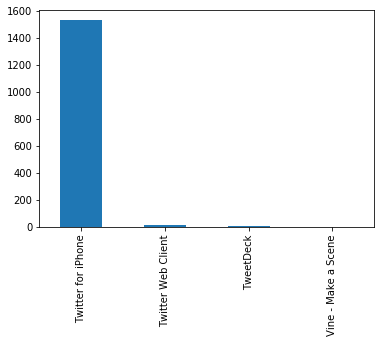

In [264]:
df.source.value_counts().plot(kind='bar');

### Most popular names given to dogs

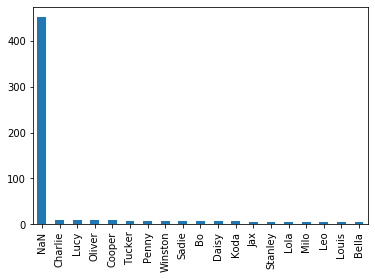

In [268]:
df.name.value_counts()[0:19].plot(kind='bar');

Penny, copper, charlie and oliver are the most popular names if we ignored the nan values 

Average Retweet and Favorite counts for dog breeds

Standard_poodle had the highest average retweet count while Saluki had the highest favorite count.

C:\Users\chinshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


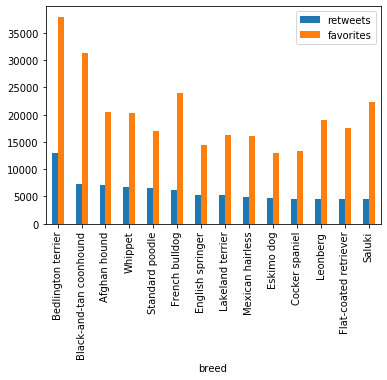

In [189]:
#group by breed and store the means of retweet_count and favorite_count.
df_group = df.groupby(['breed'])['retweets', 'favorites'].mean()
#order by retweet_count and favorite_count.
df_group = df_group.sort_values(['retweets', 'favorites'], ascending=False)
#plot the top 15 average counts.
df_group.iloc[0:14,].plot(kind='bar');


In [283]:
 import seaborn as sns
# Setup function needed
sns.set(rc={'figure.figsize':(11.7,8.27)})
def set_label(xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

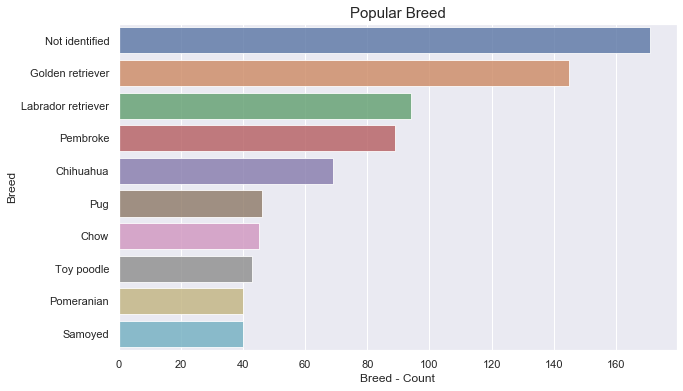

In [293]:

# Top Dog_stage values based on the count
cnt_srs = df['breed'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Breed - Count', fontsize=12)
plt.ylabel('Breed', fontsize=12)
plt.title("Popular Breed", fontsize=15)
plt.show()

<b>From the above figure we can see that their are some not identified breeds but if ignore it the most popular breed is golden retriver followed by labrador.